<a href="https://colab.research.google.com/github/tiffanyformosa/noise_sims/blob/main/noise_sims.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [267]:
import numpy as np
from sklearn.datasets import make_blobs
from numpy.random import uniform, normal, shuffle

import matplotlib.pyplot as plt
import seaborn as sns

In [332]:
def generate_ellipse(
    n_samples,
    width=1,
    height=1,
    noise=0.3,
    random_state=None,
):
    """
    Generate ellipse simulation.
    (Noise discrimination problem between ellipse and noisy ellipse)
    Parameters
    ----------
    n_samples : int
        Total number of points divided between ellipse boundary and noise
    width : float, optional (default=1)
        Width of ellipse, measured from the origin to right bound
    height : float, optional (default=1)
        height of ellipse, measured from the origin to upper bound
    noise : float, optional (default=0.3)
        Parameter controlling the amount of noise in the simulation
    random_state : int, RandomState instance, default=None
        Determines random number generation for dataset creation. Pass an int
        for reproducible output across multiple function calls.
    Returns
    -------
    X : array of shape [n_samples, 2]
        The generated samples.
    y : array of shape [n_samples]
        The integer labels for cluster membership of each sample.
        1 = ellipse, 0 = noise
    """
    if random_state != None:
        np.random.seed(random_state)

    n_noise = int(n_samples * noise)

    t = np.linspace(0, 2*np.pi, n_samples - n_noise)
    X1 = np.column_stack((width*np.cos(t), height*np.sin(t)))

    t = np.linspace(0, 2*np.pi, n_noise)
    a = width*(1+0.5*np.random.randn(n_noise))
    b = height*(1+0.5*np.random.randn(n_noise))
    X2 = np.column_stack((a*np.cos(t), b*np.sin(t)))

    X = np.append(X1, X2, axis=0)
    y = np.append(np.ones(n_samples - n_noise, dtype=int),
                  np.zeros(n_noise, dtype=int))

    return(X, y)

def generate_sinewave(
    n_samples,
    n_waves=4,
    noise=0.3,
    random_state=None,
):
    """
    Generate sinewave simulation.
    (Noise discrimination problem between sine wave and noisy sine)
    Parameters
    ----------
    n_samples : int
        Total number of points divided between ellipse boundary and noise
    n_waves : int, optional (default=4)
        Number of sine waves to include in the simulation
    noise : float, optional (default=0.3)
        Parameter controlling the amount of noise in the simulation
    random_state : int, RandomState instance, default=None
        Determines random number generation for dataset creation. Pass an int
        for reproducible output across multiple function calls.
    Returns
    -------
    X : array of shape [n_samples, 2]
        The generated samples.
    y : array of shape [n_samples]
        The integer labels for cluster membership of each sample.
        1 = sinewave, 0 = noise
    """
    if random_state != None:
        np.random.seed(random_state)

    n_noise = int(n_samples * noise)

    t = np.linspace(0, 2*n_waves*np.pi, n_samples - n_noise)
    X1 = np.column_stack((t, np.sin(t)))

    t_n = np.random.rand(n_noise)*(2*n_waves*np.pi)
    y_n = np.sin(t_n)+np.random.randn(n_noise)
    X2 = np.column_stack((t_n, y_n))

    X = np.append(X1, X2, axis=0)
    y = np.append(np.ones(n_samples - n_noise, dtype=int),
                  np.zeros(n_noise, dtype=int))
    
    return(X, y)

def generate_steps(
    n_samples,
    n_steps=2,
    step_height=0.5,
    noise=0.3,
    random_state=None,
):
    """
    Generate stepped simulation.
    (Noise discrimination problem between steps and noisy steps)
    Parameters
    ----------
    n_samples : int
        Total number of points divided between ellipse boundary and noise
    n_steps : int, optional (default=2)
        Number of steps to include in the simulation
    step_height : float, optional (default=0.5)
        distance between steps
    noise : float, optional (default=0.3)
        Parameter controlling the amount of noise in the simulation
    random_state : int, RandomState instance, default=None
        Determines random number generation for dataset creation. Pass an int
        for reproducible output across multiple function calls.
    Returns
    -------
    X : array of shape [n_samples, 2]
        The generated samples.
    y : array of shape [n_samples]
        The integer labels for cluster membership of each sample.
        1 = sinewave, 0 = noise
    """
    if random_state != None:
        np.random.seed(random_state)

    n_noise = int(n_samples * noise)

    t = np.linspace(0, n_steps, n_samples-n_noise+1)
    X1 = np.column_stack((t[0:-1], step_height*np.floor(t[0:-1])))

    t_n = np.random.rand(n_noise)*n_steps
    y_n = step_height*np.floor(t_n)+np.random.randn(n_noise)
    X2 = np.column_stack((t_n, y_n))

    X = np.append(X1, X2, axis=0)
    y = np.append(np.ones(n_samples - n_noise, dtype=int),
                  np.zeros(n_noise, dtype=int))
    
    return(X, y)

def generate_line(
    n_samples,
    m = 1.0,
    a = 1.0,
    noise=0.3,
    random_state=None,
):
    """
    Generate simulation of the form y = m(x^a).
    (Noise discrimination problem between equation and noisy coefficient)
    Parameters
    ----------
    n_samples : int
        Total number of points divided between ellipse boundary and noise
    m: float (default=1.0)
        coefficient of equation
    a: float (default=1.0)
        exponent of equation
    noise : float, optional (default=0.3)
        Parameter controlling the amount of noise in the simulation
    random_state : int, RandomState instance, default=None
        Determines random number generation for dataset creation. Pass an int
        for reproducible output across multiple function calls.
    Returns
    -------
    X : array of shape [n_samples, 2]
        The generated samples.
    y : array of shape [n_samples]
        The integer labels for cluster membership of each sample.
        1 = sinewave, 0 = noise
    """
    if random_state != None:
        np.random.seed(random_state)

    n_noise = int(n_samples * noise)

    t = np.linspace(-1, 1, n_samples-n_noise)
    if a < 1: Y1 = m*np.power(abs(t), a)
    else: Y1 = m*np.power(t, a)
    X1 = np.column_stack((t, Y1))

    t_n = 2*np.random.rand(n_noise)-1
    m_n = m + np.random.randn(n_noise)
    if a < 1: Y2 = m_n*np.power(abs(t_n), a) + np.random.randn(n_noise)
    else: Y2 = m_n*np.power(t_n, a) + np.random.randn(n_noise)
    X2 = np.column_stack((t_n, Y2))

    X = np.append(X1, X2, axis=0)
    y = np.append(np.ones(n_samples - n_noise, dtype=int),
                  np.zeros(n_noise, dtype=int))
    
    return(X, y)

def plot_2dsim(X, y, square_plot=False):
    """
    Plot 2d simulations.
    Parameters
    ----------
    X : array of shape [n_samples, 2]
        The generated samples. Other dimensions will be ignored.
    y : array of shape [n_samples]
        The integer labels for cluster membership of each sample.
    square_plot : boolean (default: False)
        If plot should be forced to be square, with origin at the center
    """
    samples = np.unique(y)
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))

    if square_plot:
      floor = max(-int(np.amin(X)), int(np.amax(X)))
      lim = [-floor, floor]
      ax.set_xlim(lim)
      ax.set_ylim(lim)

    colors = sns.color_palette("colorblind")
    for s in samples:
      ax.plot(X[y == s,0], X[y == s,1], marker=".", color=colors[s], linestyle="")
    


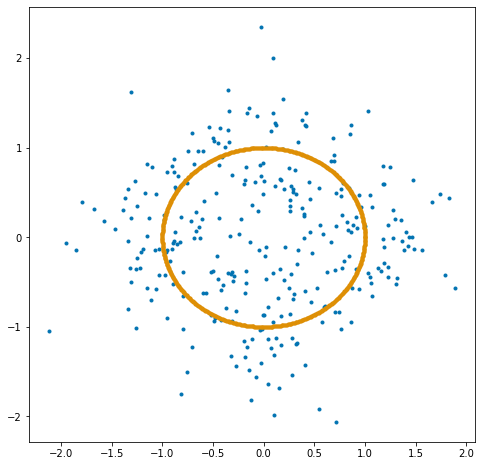

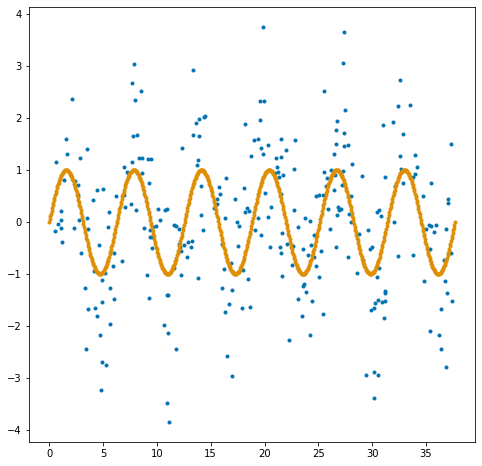

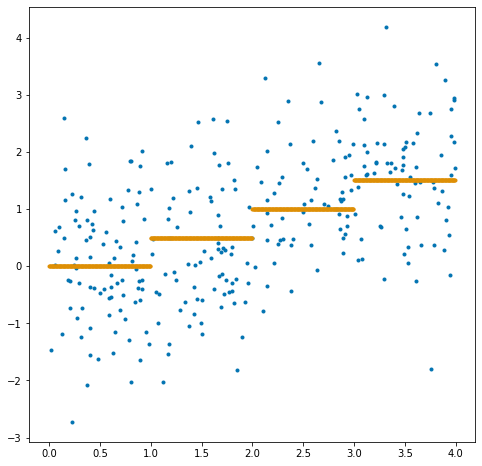

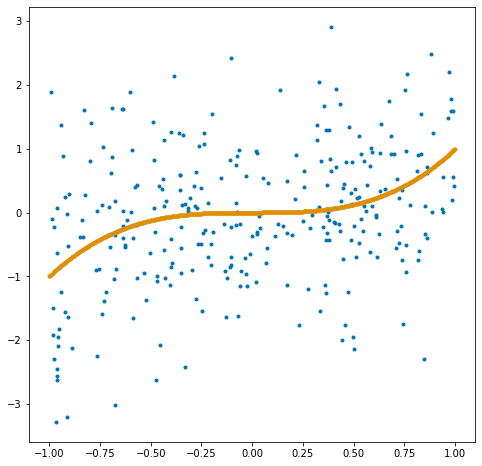

In [334]:
X, y = generate_ellipse(1000)
plot_2dsim(X, y)

X, y = generate_sinewave(1000, n_waves=6, noise=0.3)
plot_2dsim(X, y)

X, y = generate_steps(1000, n_steps=4, noise=0.3)
plot_2dsim(X, y)

X, y = generate_line(1000, a=3, noise=0.3)
plot_2dsim(X, y)

In [327]:
origins = np.array(((0, 0), (0, 1), (0, 2)))
origins is not None

True